In [7]:
import torch
from torch import optim, nn
import torchvision
from torch.utils.data import DataLoader
from Preprocess import Anime
from net import ResNet18
import matplotlib.pyplot as plt
import numpy as np 
from tqdm import tqdm
from tqdm import trange

In [8]:
batchze = 32
lr = 1e-3
epochs = 100
device = torch.device('cuda')
torch.manual_seed(1234)

In [9]:
# load data 
train_db = Anime('..\\Images', 224, 'train')
val_db = Anime('..\\Images', 224, 'val')
test_db = Anime('..\\Images', 224, 'test')

In [10]:
train_loader = DataLoader(train_db,batch_size= batchze, shuffle= True, num_workers=4)
val_loader = DataLoader(val_db,batch_size= batchze, num_workers=2)
test_loader = DataLoader(test_db,batch_size= batchze, num_workers=2)

In [11]:
def evaluate(model, loader):
    correct = 0
    total = len(loader.dataset)
    for x , y in loader:
        x, y  = x.to(device), y.to(device)
        with torch.no_grad():
            logits = model(x)
            pred = logits.argmax(dim = 1)
        correct += torch.eq(pred, y).sum().float().item()
    return correct / total

In [12]:

model = ResNet18(50).to(device)
optimizer = optim.Adam(model.parameters(),lr = lr)
criteon = nn.CrossEntropyLoss()
loss_data = []
val_acc_data = []
best_acc, best_epoch = 0, 0
global_step = 0
for epoch in trange(epochs, unit="epochs"):
    # epochs.set_description("Resnet 18 Scratch")
    for step, (x,y) in enumerate(train_loader):
        # x: [b,3,512,512] y:[b]
        x, y  = x.to(device), y.to(device)

        logits = model(x)
        loss = criteon(logits, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_data.append(loss.item())
        global_step += 1
    if epoch % 1 == 0:
        val_acc = evaluate(model, val_loader)
        if val_acc > best_acc:
            best_epoch = epoch
            best_acc = val_acc
            torch.save(model.state_dict(),'best_scratch.mdl')
        val_acc_data.append(val_acc)
print("best acc:", best_acc, "best epoch:", best_epoch)
model.load_state_dict(torch.load("best_scratch.mdl")) # load best state

print("loaded from checkpoint! ")

test_acc = evaluate(model, test_loader)
print("test acc:", test_acc)


  0%|          | 0/100 [00:00<?, ?epochs/s]

Text(0.5, 1.0, 'val_acc')

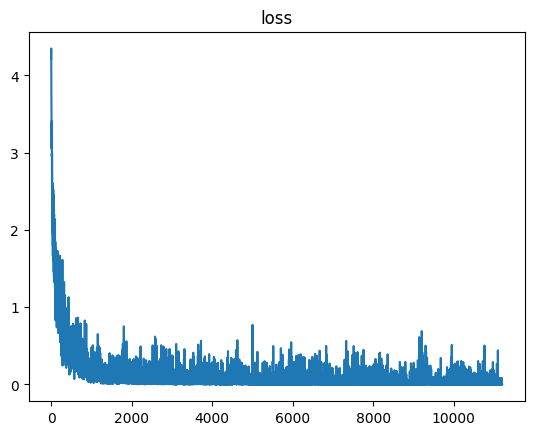

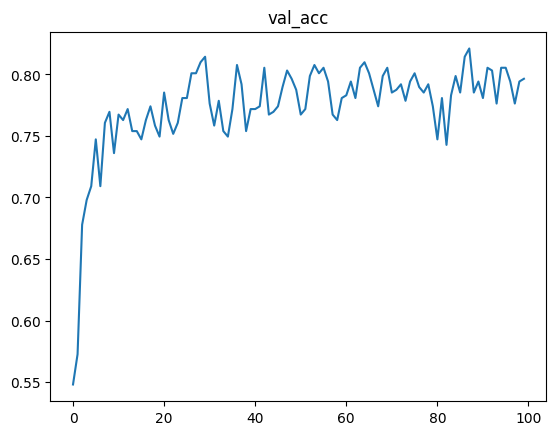

In [ ]:
# display the picture of loss and val_acc
x = np.arange(0, global_step)
x_2 = np.arange(0,epoch + 1)
fig, ax = plt.subplots()
ax.plot(x, loss_data)
ax.set_title('loss')
fig2, ax2 = plt.subplots()
ax2.plot(x_2,val_acc_data)
ax2.set_title('val_acc')

In [ ]:
p = sum(map(lambda p:p.numel(), model.parameters()))
print('parameters size:', p)

parameters size: 1274610
